# Notebook for pmag data compilation and analyses for the Cardenas Basalt and Unkar Intrusions 

Block samples collected during April 2021 Grand Canyon Field Syposium. 

## Block sample preparation

Only pmag block samples were allowed to be taken from Grand Canyon. A total of 18 Cardenas Basalt sites, 1 interflow sediment site, and 5 Unkar Intrusion sites were sampled during the field syposium. A total of 192 blocks were sampled but block CBS1-8 (an interflow sediment block) went missing duirng shipping. 

Block sampling was done with both magnetic brunton compass (that has magnetic declination set as 0 both in the field and in lab and we perform declination correction later) as well as a sun compass. An oriented flat surface on each block is used as the marker for the outcrop orientation and the block are later drilled in the lab with water-cooled drill press for standard 2.5 cm pmag cores. Then the block in lab are reoriented back to their outcrop orientation and the cores are then oriented with a pomery fixture. 

Because the sun compass orientations are matched with the brunton compass strike measurement (**mag_strike**) on block surface, not the core plate, we do not have sun orientations for the actually cores, but only the magnetic core plate strike orientations. However, the sun compass is still preferentially used for correcting the orientation of blocks when collecting the drilled cores. We use the make_sam_file.py in our SAM_header repository to calculate the expected magnetic declination given the sun compass measurement (*sun_core_strike (in this case it is for block surface not core plate)*) and compare the difference with the magnetic declination reading (**calualted_mag_dec**). Usually the *calualted_mag_dec* match very closely with the *IGRF_local_dec*. Thus for all block reorienting, we preferentially use **sun_core_strike** when we have sun reading, or we use **mag_strike + IGRF_local_dec** for the block orientations. 


## Pmag data compilation

In [1]:
import pandas as pd
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import matplotlib
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
%config InlineBackend.figure_format='retina'

### import all thermal demag data

In [2]:
all_sites_data = pd.read_csv('../data/pmag_new/GC_thermal_demag/sites.txt', header = 1, sep='\t')
all_specimens_data = pd.read_csv('../data/pmag_new/GC_thermal_demag/specimens.txt', header = 1, sep='\t')

### extract Unkar Intrusions data

We collected 5 Unkar intrusions from the Grand Canyon, named UI1 to UI5. UI4 and UI5 have had zircon-bearing felsic segregations extracted and dated to be ca. 1098 Ma. Intrusion 4 and 5 are spatially close but are about 70 river miles from UI 1,2,3 which are close together.

In [3]:
UI_site_data = all_sites_data[all_sites_data['site'].str.contains('UI')].reset_index(drop=1)
UI_site_data_tc = UI_site_data[(UI_site_data['dir_tilt_correction'] == 100) & (UI_site_data['dir_comp_name'] == 'mt')].reset_index()
UI_site_data_is = UI_site_data[(UI_site_data['dir_tilt_correction'] == 0) & (UI_site_data['dir_comp_name'] == 'mt')].reset_index()

UI_specimen_data = all_specimens_data[all_specimens_data['site'].str.contains('UI')].reset_index(drop=1)

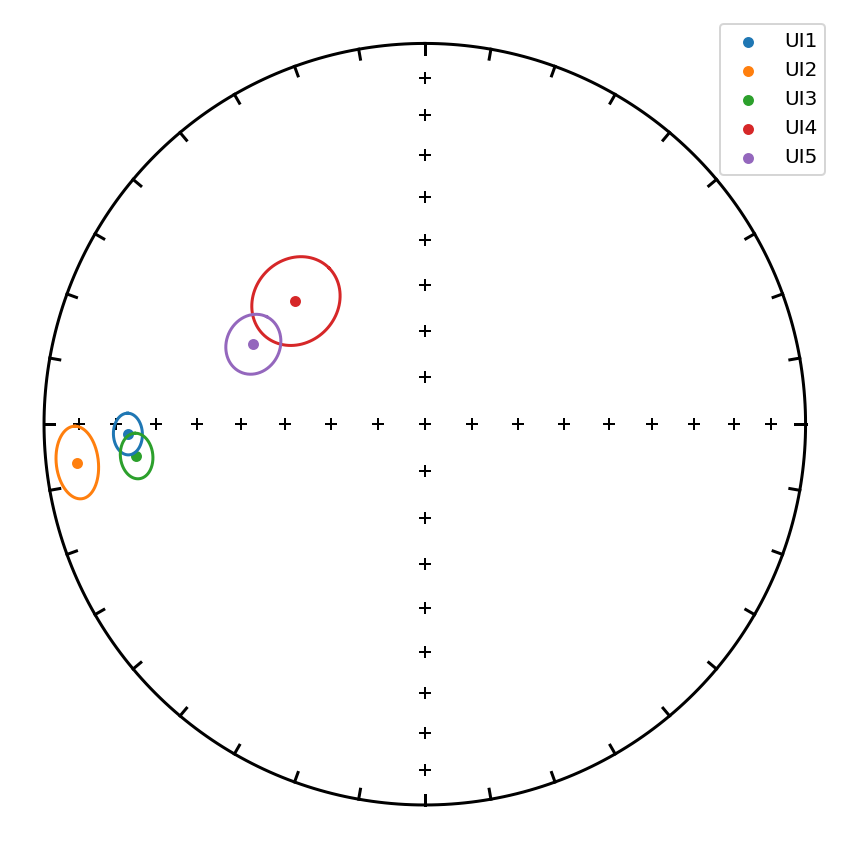

In [4]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
for i in range(UI_site_data_tc.shape[0]):
    ipmag.plot_di_mean(UI_site_data_tc['dir_dec'].tolist()[i], 
                     UI_site_data_tc['dir_inc'].tolist()[i], 
                     UI_site_data_tc['dir_alpha95'].tolist()[i],
                     color = 'C'+str(i), label = UI_site_data_tc['site'].tolist()[i])
plt.legend()
plt.show()

<Figure size 432x432 with 0 Axes>

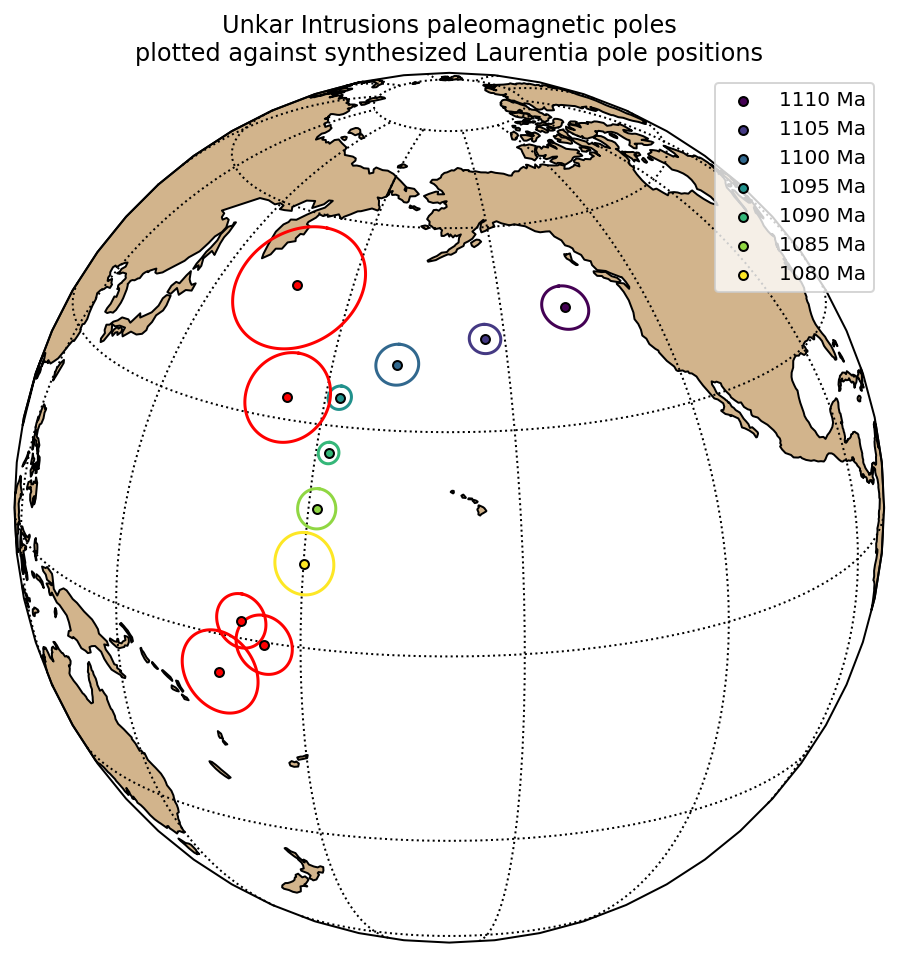

In [5]:
plt.figure(figsize = (6,6))
m = ipmag.make_orthographic_map(central_longitude=200, central_latitude=20)

synthetic_ages = [1080, 1085, 1090, 1095, 1100, 1105, 1110]
cNorm  = colors.Normalize(vmin=min(synthetic_ages), vmax=max(synthetic_ages))
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis')

synthetic_colors = [colors.rgb2hex(scalarMap.to_rgba(synthetic_ages[i])) for i in range(len(synthetic_ages))]

one_Euler_pole_lon = np.loadtxt('../data/mcplates_results/pole_lon_positions_2_true.txt')
one_Euler_pole_lat = np.loadtxt('../data/mcplates_results/pole_lat_positions_2_true.txt')

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(m,fisher0['dec'],fisher0['inc'],theta0,color=synthetic_colors[0],label='1110 Ma')

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(m,fisher1['dec'],fisher1['inc'],theta1,color=synthetic_colors[1],label='1105 Ma')

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(m,fisher2['dec'],fisher2['inc'],theta2,color=synthetic_colors[2],label='1100 Ma')

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(m,fisher3['dec'],fisher3['inc'],theta3,color=synthetic_colors[3],label='1095 Ma')

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(m,fisher4['dec'],fisher4['inc'],theta4,color=synthetic_colors[4],label='1090 Ma')

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(m,fisher5['dec'],fisher5['inc'],theta5,color=synthetic_colors[5],label='1085 Ma')

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(m,fisher6['dec'],fisher6['inc'],theta6,color=synthetic_colors[6],label='1080 Ma')

for i in range(UI_site_data_tc.shape[0]):
    this_lat, this_lon = pmag.pt_rot([37, -103, 3.9], [UI_site_data_tc['vgp_lat'].tolist()[i]], [UI_site_data_tc['vgp_lon'].tolist()[i]])
    
    ipmag.plot_pole(m, this_lon[0], 
                     this_lat[0], 
                     UI_site_data_tc['dir_alpha95'].tolist()[i],
                     color = 'r')
plt.title('Unkar Intrusions paleomagnetic poles\nplotted against synthesized Laurentia pole positions')
plt.legend()
plt.savefig('../Figure/Unkar_Poles.pdf', bbox_inches='tight', dpi=500)
plt.show()

### import Cardenas Basalts data

In [6]:
CB_site_data = all_sites_data[all_sites_data['site'].str.contains('CB')].reset_index(drop=1)
# get low temp component in geographic coordinates
CB_site_data_lt_gc = CB_site_data[(CB_site_data['dir_tilt_correction'] == 0) & (CB_site_data['dir_comp_name'] == 'lt')]

# get mid temp component in tilt-corrected coordinates
CB_site_data_mt_tc = CB_site_data[(CB_site_data['dir_tilt_correction'] == 100) & (CB_site_data['dir_comp_name'] == 'mt')]

# get maghemite temp component in tilt-corrected coordinates
CB_site_data_mht_tc = CB_site_data[(CB_site_data['dir_tilt_correction'] == 100) & (CB_site_data['dir_comp_name'] == 'mht')]

# get high temp component in tilt-corrected coordinates
CB_site_data_ht_tc = CB_site_data[(CB_site_data['dir_tilt_correction'] == 100) & (CB_site_data['dir_comp_name'] == 'ht')]

CB_specimen_data = all_specimens_data[all_specimens_data['site'].str.contains('CB')].reset_index(drop=1)
CB_specimen_data_mt_tc = CB_specimen_data[(CB_specimen_data['dir_tilt_correction'] == 100) & (CB_specimen_data['dir_comp'] == 'mt')]
CB_specimen_data_mht_tc = CB_specimen_data[(CB_specimen_data['dir_tilt_correction'] == 100) & (CB_specimen_data['dir_comp'] == 'mht')]
CB_specimen_data_ht_tc = CB_specimen_data[(CB_specimen_data['dir_tilt_correction'] == 100) & (CB_specimen_data['dir_comp'] == 'ht')]

#### Cardenas Basalts low temperature present day local field directions

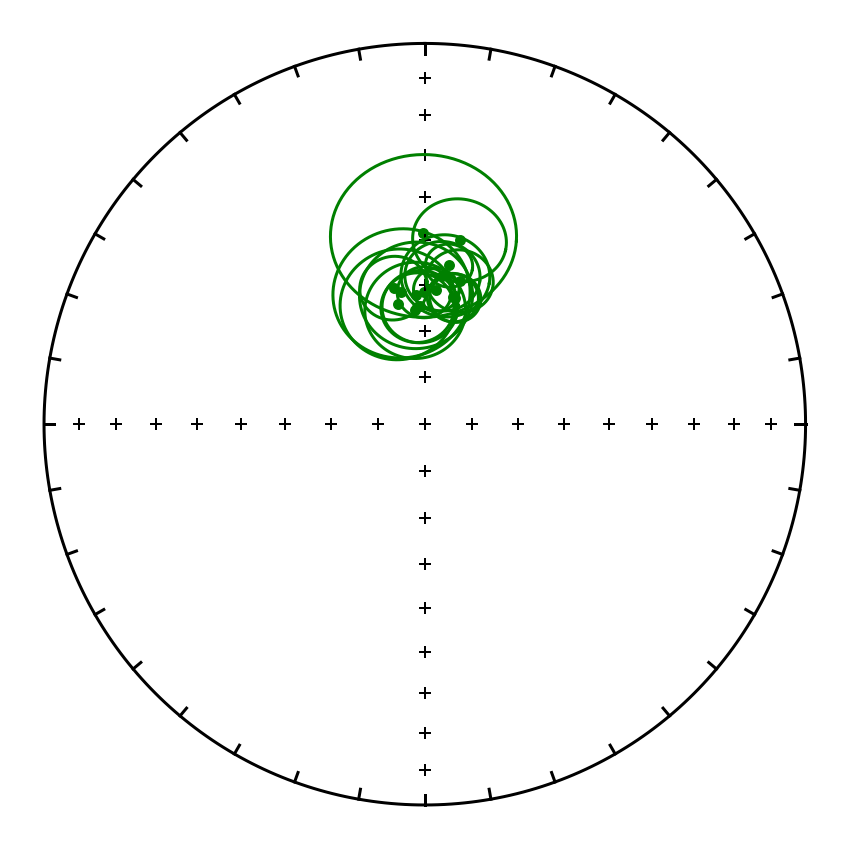

In [7]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
for i in range(CB_site_data_lt_gc.shape[0]):
    ipmag.plot_di_mean(CB_site_data_lt_gc['dir_dec'].tolist()[i], 
                     CB_site_data_lt_gc['dir_inc'].tolist()[i], 
                     CB_site_data_lt_gc['dir_alpha95'].tolist()[i],
                     color = 'green')
# plt.legend()
plt.show()

#### Cardenas Basalts medium temperature magnetite directions

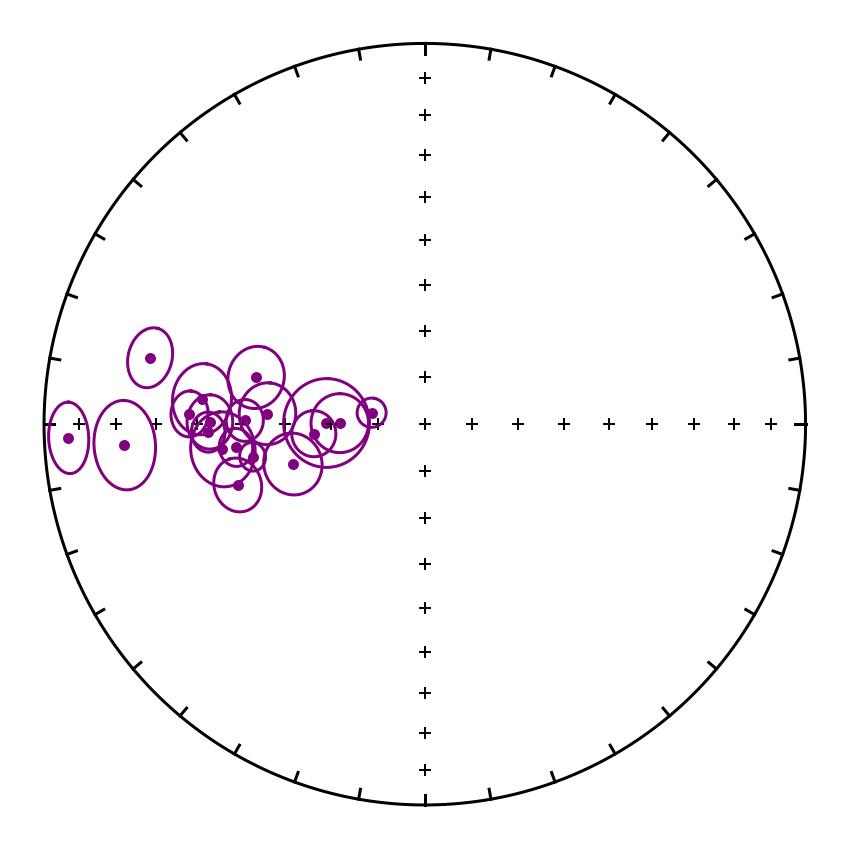

In [8]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
for i in range(CB_site_data_mt_tc.shape[0]):
    ipmag.plot_di_mean(CB_site_data_mt_tc['dir_dec'].tolist()[i], 
                     CB_site_data_mt_tc['dir_inc'].tolist()[i], 
                     CB_site_data_mt_tc['dir_alpha95'].tolist()[i],
                     color = 'purple')
# plt.legend()
plt.show()

<Figure size 432x432 with 0 Axes>

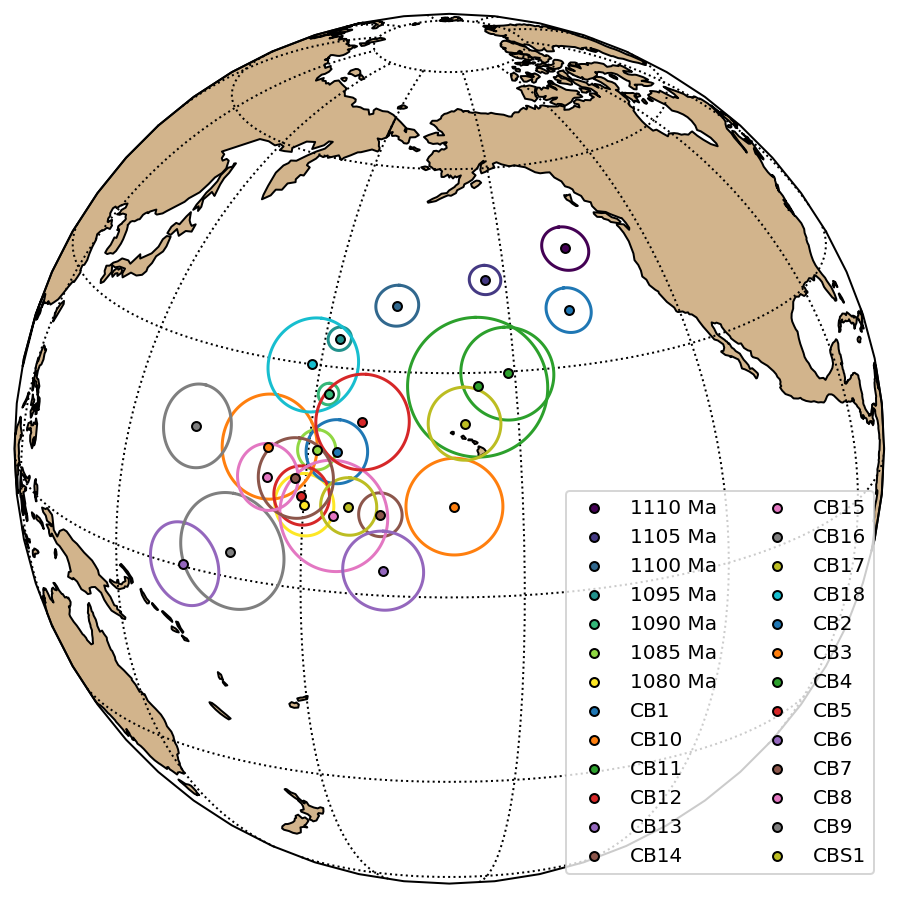

In [9]:
plt.figure(figsize = (6,6))
m = ipmag.make_orthographic_map(central_longitude=200, central_latitude=20)

synthetic_ages = [1080, 1085, 1090, 1095, 1100, 1105, 1110]
cNorm  = colors.Normalize(vmin=min(synthetic_ages), vmax=max(synthetic_ages))
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis')

synthetic_colors = [colors.rgb2hex(scalarMap.to_rgba(synthetic_ages[i])) for i in range(len(synthetic_ages))]

one_Euler_pole_lon = np.loadtxt('../data/mcplates_results/pole_lon_positions_2_true.txt')
one_Euler_pole_lat = np.loadtxt('../data/mcplates_results/pole_lat_positions_2_true.txt')

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(m,fisher0['dec'],fisher0['inc'],theta0,color=synthetic_colors[0],label='1110 Ma')

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(m,fisher1['dec'],fisher1['inc'],theta1,color=synthetic_colors[1],label='1105 Ma')

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(m,fisher2['dec'],fisher2['inc'],theta2,color=synthetic_colors[2],label='1100 Ma')

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(m,fisher3['dec'],fisher3['inc'],theta3,color=synthetic_colors[3],label='1095 Ma')

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(m,fisher4['dec'],fisher4['inc'],theta4,color=synthetic_colors[4],label='1090 Ma')

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(m,fisher5['dec'],fisher5['inc'],theta5,color=synthetic_colors[5],label='1085 Ma')

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(m,fisher6['dec'],fisher6['inc'],theta6,color=synthetic_colors[6],label='1080 Ma')

for i in range(CB_site_data_mt_tc.shape[0]):
    ipmag.plot_pole(m, CB_site_data_mt_tc['vgp_lon'].tolist()[i], 
                     CB_site_data_mt_tc['vgp_lat'].tolist()[i], 
                     CB_site_data_mt_tc['dir_alpha95'].tolist()[i],
                     color = 'C'+str(i), label = CB_site_data_mt_tc['site'].tolist()[i])


plt.legend(ncol=2)
plt.show()

### Cardenas Basalts at Nankoweap trail

site CB1, CB2, CB3, CB4, CB5, CB6, CB7 are collected form river mile 52 Nankoweap Trail. 

2 specimens from CB4 has decent mt component; other specimens typically have a mht component that has the opposite direction as the ht component which gets up to 680 degre unblocking temperature. This is likely a signal of having self-reversal magnetization as maghematization alters primary magnetite into maghemite. 

In [10]:
CB_Nankoweap_mt_tc = CB_site_data_mt_tc[CB_site_data_mt_tc['site'].isin(['CB1','CB2','CB3','CB5'])]

In [11]:
CB4_site_data_mht_tc = CB_site_data_mht_tc

CB4_site_ht_tc = CB_site_data_ht_tc[CB_site_data_ht_tc['site'] == 'CB4']
CB4_specimen_ht_tc = CB_specimen_data_ht_tc[CB_specimen_data_ht_tc['site'] == 'CB4']
CB4_specimen_mht_tc = CB_specimen_data_mht_tc[CB_specimen_data_mht_tc['site'] == 'CB4']
CB4_specimen_mt_tc = CB_specimen_data_mt_tc[CB_specimen_data_mt_tc['site'] == 'CB4']

CB4 maghemite and hematite components pass a reversal test

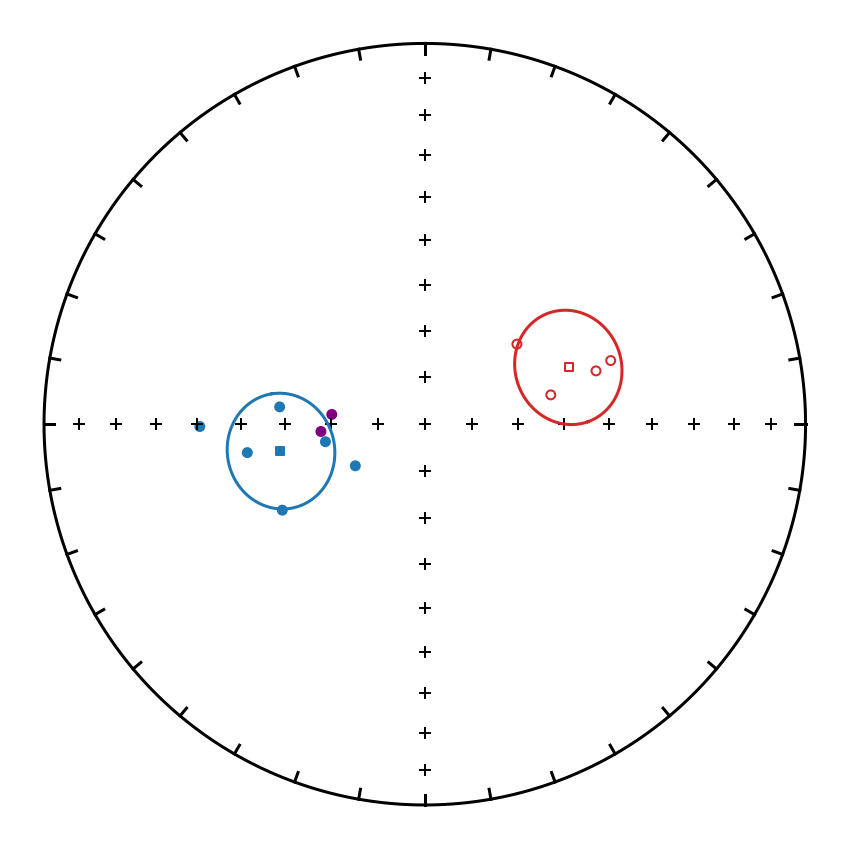

In [12]:
plt.figure(figsize=(6,6))
ipmag.plot_net()

ipmag.plot_di(CB4_specimen_mt_tc['dir_dec'].tolist(), CB4_specimen_mt_tc['dir_inc'].tolist(), color = 'purple')

ipmag.plot_di(CB4_specimen_ht_tc['dir_dec'].tolist(), CB4_specimen_ht_tc['dir_inc'].tolist(), color = 'C0')
ipmag.plot_di_mean(CB4_site_ht_tc['dir_dec'].tolist()[0],  CB4_site_ht_tc['dir_inc'].tolist()[0], CB4_site_ht_tc['dir_alpha95'].tolist()[0]
                   , marker = 's', color='C0')

ipmag.plot_di(CB4_specimen_mht_tc['dir_dec'].tolist(), CB4_specimen_mht_tc['dir_inc'].tolist(), color = 'C3')
ipmag.plot_di_mean(CB4_site_data_mht_tc['dir_dec'].tolist()[0],  CB4_site_data_mht_tc['dir_inc'].tolist()[0], CB4_site_data_mht_tc['dir_alpha95'].tolist()[0]
                   , marker = 's', color='C3')

In [13]:
ipmag.reversal_test_MM1990(dec=CB4_specimen_ht_tc['dir_dec'].tolist()+CB4_specimen_mht_tc['dir_dec'].tolist(), 
                           inc=CB4_specimen_ht_tc['dir_inc'].tolist()+CB4_specimen_mht_tc['dir_inc'].tolist())

Results of Watson V test: 

Watson's V:           1.2
Critical value of V:  7.2
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 6.2
Critical angle for M&M1990:   14.9
The McFadden and McElhinny (1990) classification for
this test is: 'C'


In [14]:
ipmag.reversal_test_MM1990(dec=CB4_specimen_ht_tc['dir_dec'].tolist()+CB4_specimen_mht_tc['dir_dec'].tolist()+CB4_specimen_mt_tc['dir_dec'].tolist(), 
                           inc=CB4_specimen_ht_tc['dir_inc'].tolist()+CB4_specimen_mht_tc['dir_inc'].tolist()+CB4_specimen_mt_tc['dir_inc'].tolist())

Results of Watson V test: 

Watson's V:           2.7
Critical value of V:  7.3
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 8.2
Critical angle for M&M1990:   13.4
The McFadden and McElhinny (1990) classification for
this test is: 'C'


**Therefore, we can group the mt, mht, and ht components of this site and use them to calculate mean statistics**

In [15]:
CB4_directions = pd.concat([CB4_specimen_ht_tc, CB4_specimen_mht_tc, CB4_specimen_mt_tc])
CB4_directions.head()

,specimen,experiments,sample,dir_alpha95,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_n_measurements,dir_tilt_correction,...,instrument_codes,software_packages,int_corr,citations,method_codes,result_quality,volume,weight,location,site
598,CB4-3a,CB4-3a_LP-DIR-T,CB4-3,NaN,ht,238.9,54.0,3.0,8.0,100.0,...,hargrave 2021-12-03 19:34:42,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT,g,NaN,NaN,Grand Canyon,CB4
608,CB4-4a,CB4-4a_LP-DIR-T,CB4-4,NaN,ht,260.0,68.4,3.0,26.0,100.0,...,hargrave 2021-12-03 19:36:26,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT,g,NaN,NaN,Grand Canyon,CB4
617,CB4-5a,CB4-5a_LP-DIR-T,CB4-5,NaN,ht,260.9,51.0,3.0,11.0,100.0,...,hargrave 2021-12-03 19:39:11,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT,g,NaN,NaN,Grand Canyon,CB4
625,CB4-6a,CB4-6a_LP-DIR-T,CB4-6,NaN,ht,276.8,58.5,3.0,8.0,100.0,...,hargrave 2021-12-03 19:40:39,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT,g,NaN,NaN,Grand Canyon,CB4
630,CB4-7a,CB4-7a_LP-DIR-T,CB4-7,NaN,ht,269.4,40.6,3.0,11.0,100.0,...,hargrave 2021-12-03 19:42:04,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT,g,NaN,NaN,Grand Canyon,CB4


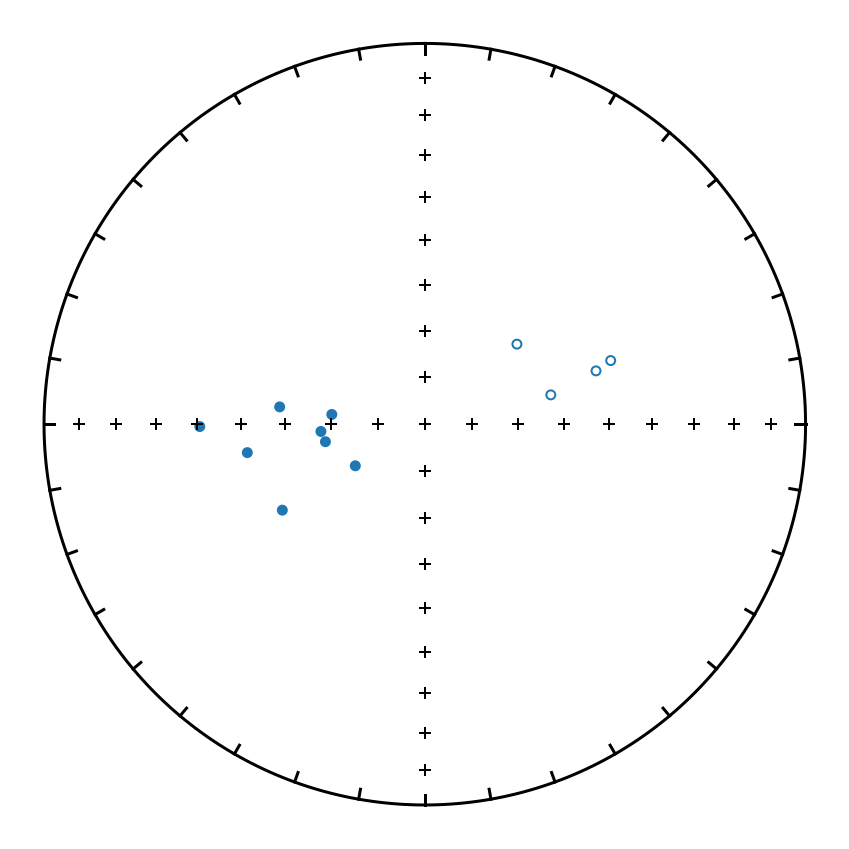

In [16]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(CB4_directions['dir_dec'].tolist(), 
                     CB4_directions['dir_inc'].tolist(),
                     color = 'C0')

# plt.legend()
plt.show()

**recalculate CB4 mean direction using combined mt, mht, ht components**

{'dec': 256.7466013101416,
 'inc': 59.67613941634901,
 'n': 12,
 'r': 11.738879854856574,
 'k': 42.12620207436695,
 'alpha95': 6.765368945376545,
 'csd': 12.479835635157508}

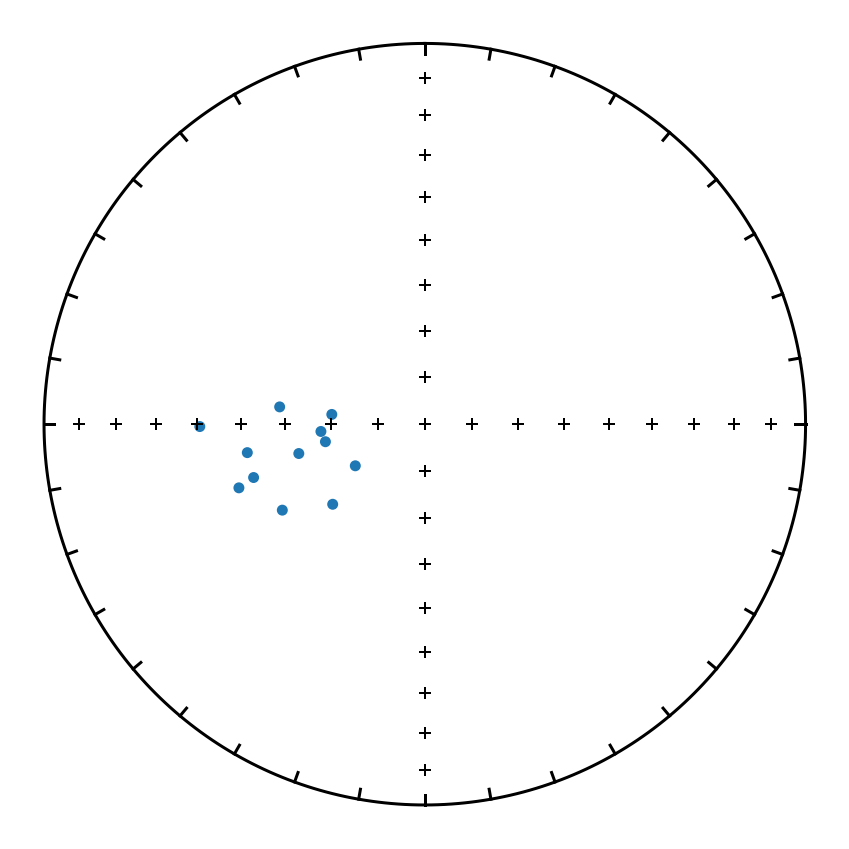

In [17]:
CB4_decs = [CB4_directions['dir_dec'].tolist()[i] if CB4_directions['dir_inc'].tolist()[i] > 0 else CB4_directions['dir_dec'].tolist()[i]+180 for i in range(CB4_directions.shape[0])]
CB4_incs = [CB4_directions['dir_inc'].tolist()[i] if CB4_directions['dir_inc'].tolist()[i] > 0 else -CB4_directions['dir_inc'].tolist()[i] for i in range(CB4_directions.shape[0])]
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(CB4_decs, CB4_incs, color = 'C0')


CB4_mean_dir = ipmag.fisher_mean(CB4_decs, CB4_incs)
CB4_mean_dir

**recalculate CB4 mean pole using combined mt, mht, ht components**

In [18]:
CB4_vgps = np.array([pmag.dia_vgp(CB4_decs[i], CB4_incs[i], 0, CB4_site_data_mht_tc['lat'].tolist()[0], CB4_site_data_mht_tc['lon'].tolist()[0]) for i in range(len(CB4_decs))]).T[:2]
CB4_dpdm = pmag.dia_vgp(CB4_mean_dir['dec'], CB4_mean_dir['inc'], CB4_mean_dir['alpha95'], CB4_site_data_mht_tc['lat'].tolist()[0], CB4_site_data_mht_tc['lon'].tolist()[0])
CB4_mean_pole = ipmag.fisher_mean(CB4_vgps[0], CB4_vgps[1])

<Figure size 432x432 with 0 Axes>

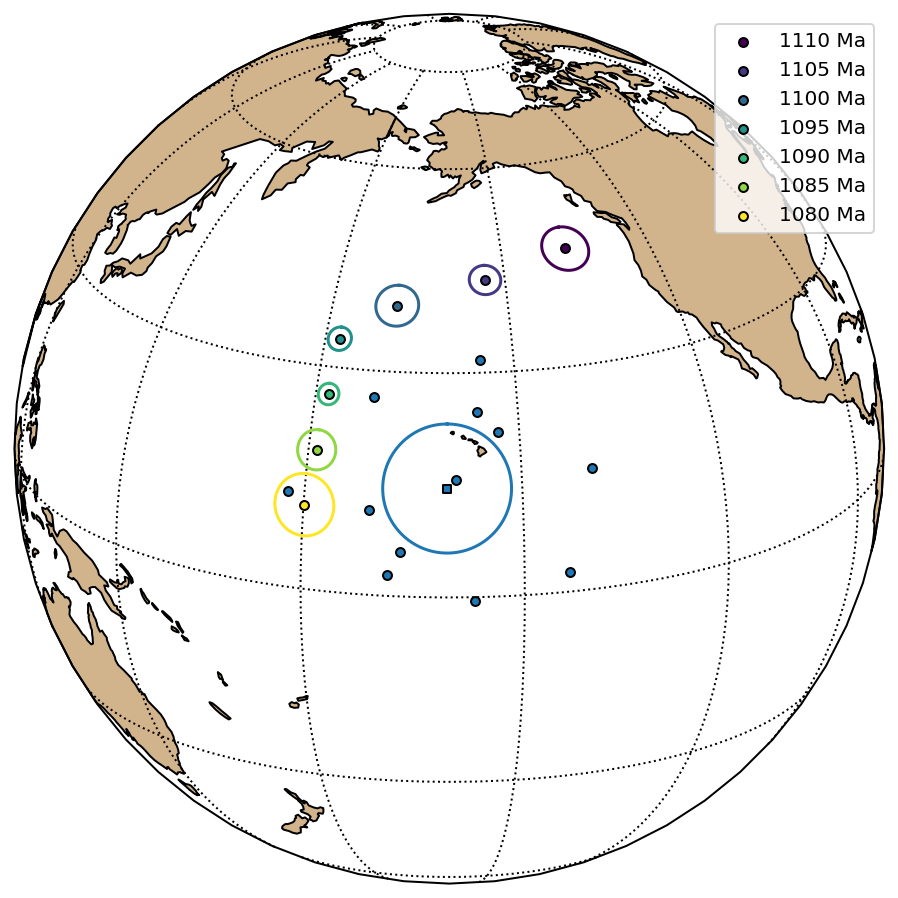

In [19]:
plt.figure(figsize = (6,6))
m = ipmag.make_orthographic_map(central_longitude=200, central_latitude=20)

synthetic_ages = [1080, 1085, 1090, 1095, 1100, 1105, 1110]
cNorm  = colors.Normalize(vmin=min(synthetic_ages), vmax=max(synthetic_ages))
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis')

synthetic_colors = [colors.rgb2hex(scalarMap.to_rgba(synthetic_ages[i])) for i in range(len(synthetic_ages))]

one_Euler_pole_lon = np.loadtxt('../data/mcplates_results/pole_lon_positions_2_true.txt')
one_Euler_pole_lat = np.loadtxt('../data/mcplates_results/pole_lat_positions_2_true.txt')

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(m,fisher0['dec'],fisher0['inc'],theta0,color=synthetic_colors[0],label='1110 Ma')

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(m,fisher1['dec'],fisher1['inc'],theta1,color=synthetic_colors[1],label='1105 Ma')

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(m,fisher2['dec'],fisher2['inc'],theta2,color=synthetic_colors[2],label='1100 Ma')

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(m,fisher3['dec'],fisher3['inc'],theta3,color=synthetic_colors[3],label='1095 Ma')

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(m,fisher4['dec'],fisher4['inc'],theta4,color=synthetic_colors[4],label='1090 Ma')

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(m,fisher5['dec'],fisher5['inc'],theta5,color=synthetic_colors[5],label='1085 Ma')

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(m,fisher6['dec'],fisher6['inc'],theta6,color=synthetic_colors[6],label='1080 Ma')

ipmag.plot_vgp(m, CB4_vgps[0], CB4_vgps[1], color = 'C0')
ipmag.plot_pole(m, CB4_mean_pole['dec'], CB4_mean_pole['inc'], CB4_mean_pole['alpha95'], marker = 's', color='C0')

plt.legend()
plt.show()

In [20]:
CB_Nankoweap_mt_tc=CB_Nankoweap_mt_tc.append({ 'site': 'CB4',
                            'location':                                                       'Grand Canyon',
                            'samples':                    ' CB4-1:CB4-2:CB4-3:CB4-4:CB4-5:CB4-6:CB4-7:CB4-8',
                            'specimens':           'CB4-1a:CB4-2a:CB4-3a:CB4-4a:CB4-5a:CB4-6a:CB4-7a:CB4-8a',
                            'dir_alpha95':                                   round(CB4_mean_dir['alpha95'],1),
                            'dir_comp_name':                                                            'mt',
                            'dir_dec':                                                              round(CB4_mean_dir['dec'],1),
                            'dir_inc':                                                              round(CB4_mean_dir['inc'],1),
                            'dir_k':                                                                round(CB4_mean_dir['k'],1),
                            'dir_n_samples':                                                        8,
                            'dir_n_specimens':                                                      8,
                            'dir_n_specimens_lines':                                                8,
                            'dir_n_specimens_planes':                                               0,
                            'dir_polarity':                                                              't',
                            'dir_r':                                                                round(CB4_mean_dir['r'],1),
                            'dir_tilt_correction':                                                     100,
                            'lat':                                                                   CB4_site_data_mht_tc['lat'].tolist()[0],
                            'lon':                                                                  CB4_site_data_mht_tc['lon'].tolist()[0],
                            'analysts':                                                                'NaN',
                            'criteria':                                                             'ACCEPT',
                            'software_packages':                          'pmagpy-4.2.24-1: demag_gui.v.3.0',
                            'citations':                                                        'This study',
                            'method_codes':              'LP-DIR-T:DE-BFL:DA-DIR-TILT:LP-DC4:DE-FM:DA-DIR-GEO',
                            'result_quality':                                                            'g',
                            'vgp_dm':                                                                  CB4_dpdm[2],
                            'vgp_dp':                                                                  CB4_dpdm[3],
                            'vgp_lat':                                                                CB4_mean_pole['inc'],
                            'vgp_lon':                                                               CB4_mean_pole['dec']}, ignore_index=1)


In [21]:
CB_Nankoweap_mt_tc

,site,location,samples,specimens,dir_alpha95,dir_comp_name,dir_dec,dir_inc,dir_k,dir_n_samples,...,analysts,criteria,software_packages,citations,method_codes,result_quality,vgp_dm,vgp_dp,vgp_lat,vgp_lon
0,CB1,Grand Canyon,CB1-1:CB1-2:CB1-3:CB1-4:CB1-5:CB1-6:CB1-7:CB1-8,CB1-1a:CB1-2a:CB1-3a:CB1-4a:CB1-5a:CB1-6a:CB1-...,4.2,mt,271.2,50.9,179.0,8,...,NaN,ACCEPT,pmagpy-4.2.24-1: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT:LP-DC4:DE-FM:DA-DI...,g,5.7000,3.800000,18.900000,184.100000
1,CB2,Grand Canyon,CB2-1:CB2-2:CB2-3:CB2-4:CB2-5:CB2-6:CB2-7:CB2-8,CB2-1a:CB2-2a:CB2-3a:CB2-4a:CB2-5a:CB2-6a:CB2-...,3.1,mt,282.2,78.4,327.0,8,...,NaN,ACCEPT,pmagpy-4.2.24-1: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT:LP-DC4:DE-FM:DA-DI...,g,5.9000,5.500000,37.600000,220.300000
2,CB3,Grand Canyon,CB3-1:CB3-2:CB3-3:CB3-4:CB3-6:CB3-7:CB3-8,CB3-1a:CB3-2a:CB3-3a:CB3-4a:CB3-6a:CB3-7a:CB3-8a,6.4,mt,253.2,60.3,89.0,7,...,NaN,ACCEPT,pmagpy-4.2.24-1: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT:LP-DC4:DE-FM:DA-DI...,g,9.7000,7.400000,12.300000,200.700000
3,CB5,Grand Canyon,CB5-1:CB5-2:CB5-3:CB5-4:CB5-5:CB5-6:CB5-7:CB5-...,CB5-1a:CB5-2a:CB5-3a:CB5-4a:CB5-5a:CB5-6a:CB5-...,6.3,mt,273.8,55.9,68.0,9,...,NaN,ACCEPT,pmagpy-4.2.24-1: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT:LP-DC4:DE-FM:DA-DI...,g,9.0000,6.500000,23.100000,187.400000
4,CB4,Grand Canyon,CB4-1:CB4-2:CB4-3:CB4-4:CB4-5:CB4-6:CB4-7:CB4-8,CB4-1a:CB4-2a:CB4-3a:CB4-4a:CB4-5a:CB4-6a:CB4-...,6.8,mt,256.7,59.7,42.1,8,...,NaN,ACCEPT,pmagpy-4.2.24-1: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT:LP-DC4:DE-FM:DA-DI...,g,7.6673,10.185491,14.691619,199.703264


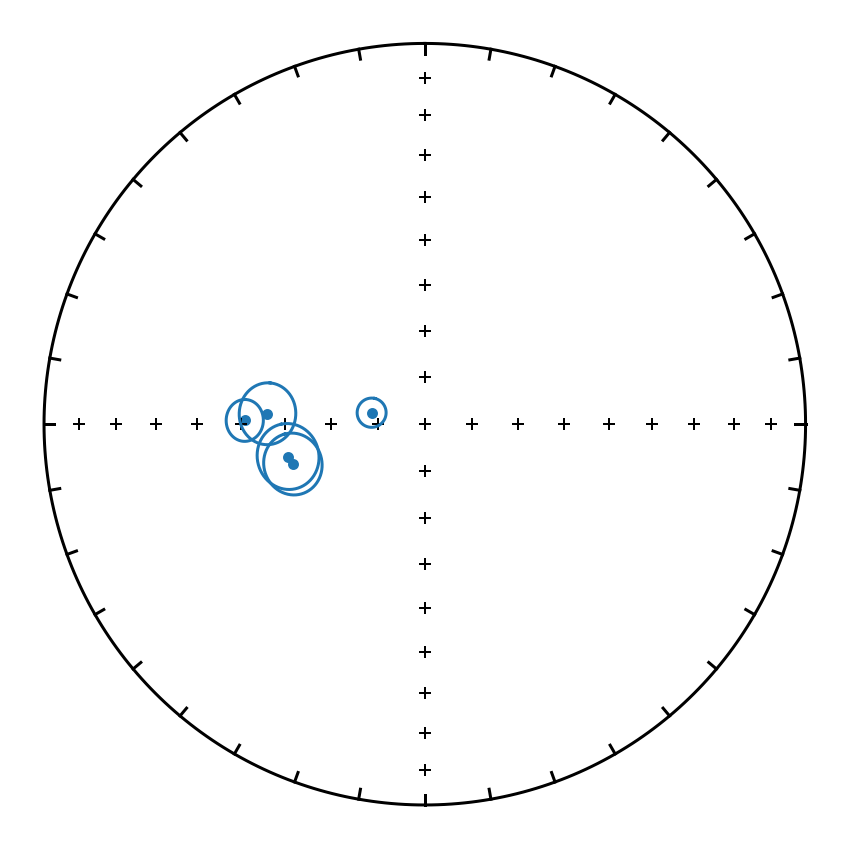

In [22]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
for i in range(CB_Nankoweap_mt_tc.shape[0]):
    ipmag.plot_di_mean(CB_Nankoweap_mt_tc['dir_dec'].tolist()[i], 
                     CB_Nankoweap_mt_tc['dir_inc'].tolist()[i], 
                     CB_Nankoweap_mt_tc['dir_alpha95'].tolist()[i],
                     color = 'C0')

# plt.legend()
plt.show()

<Figure size 432x432 with 0 Axes>

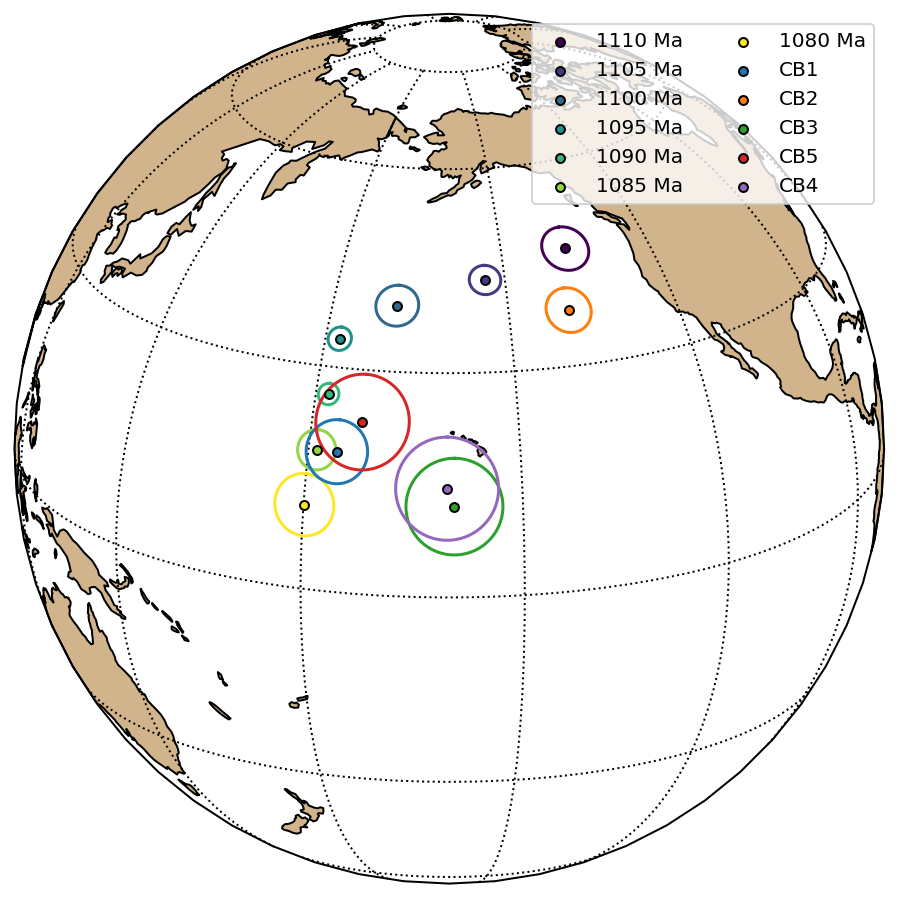

In [23]:
plt.figure(figsize = (6,6))
m = ipmag.make_orthographic_map(central_longitude=200, central_latitude=20)

synthetic_ages = [1080, 1085, 1090, 1095, 1100, 1105, 1110]
cNorm  = colors.Normalize(vmin=min(synthetic_ages), vmax=max(synthetic_ages))
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis')

synthetic_colors = [colors.rgb2hex(scalarMap.to_rgba(synthetic_ages[i])) for i in range(len(synthetic_ages))]

one_Euler_pole_lon = np.loadtxt('../data/mcplates_results/pole_lon_positions_2_true.txt')
one_Euler_pole_lat = np.loadtxt('../data/mcplates_results/pole_lat_positions_2_true.txt')

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(m,fisher0['dec'],fisher0['inc'],theta0,color=synthetic_colors[0],label='1110 Ma')

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(m,fisher1['dec'],fisher1['inc'],theta1,color=synthetic_colors[1],label='1105 Ma')

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(m,fisher2['dec'],fisher2['inc'],theta2,color=synthetic_colors[2],label='1100 Ma')

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(m,fisher3['dec'],fisher3['inc'],theta3,color=synthetic_colors[3],label='1095 Ma')

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(m,fisher4['dec'],fisher4['inc'],theta4,color=synthetic_colors[4],label='1090 Ma')

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(m,fisher5['dec'],fisher5['inc'],theta5,color=synthetic_colors[5],label='1085 Ma')

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(m,fisher6['dec'],fisher6['inc'],theta6,color=synthetic_colors[6],label='1080 Ma')

for i in range(CB_Nankoweap_mt_tc.shape[0]):
    ipmag.plot_pole(m, CB_Nankoweap_mt_tc['vgp_lon'].tolist()[i], 
                     CB_Nankoweap_mt_tc['vgp_lat'].tolist()[i], 
                     CB_Nankoweap_mt_tc['dir_alpha95'].tolist()[i],
                     color = 'C'+str(i), label = CB_Nankoweap_mt_tc['site'].tolist()[i])


plt.legend(ncol=2)
plt.show()

### Cardenas Basalts at Lava Chuar Canyon

site CB6, CB7 are collected form river mile 65 Nankoweap Trail. 

In [24]:
CB_Lava_Chuar_mt_tc = CB_site_data_mt_tc[CB_site_data_mt_tc['site'].isin(['CB6','CB7'])]

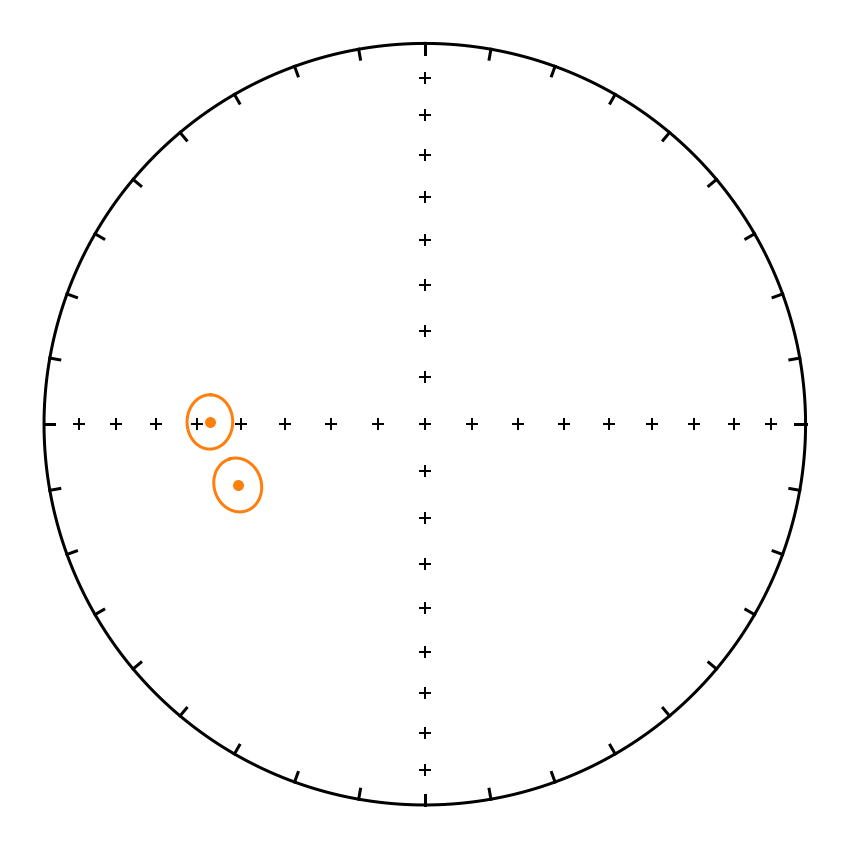

In [25]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
for i in range(CB_Lava_Chuar_mt_tc.shape[0]):
    ipmag.plot_di_mean(CB_Lava_Chuar_mt_tc['dir_dec'].tolist()[i], 
                     CB_Lava_Chuar_mt_tc['dir_inc'].tolist()[i], 
                     CB_Lava_Chuar_mt_tc['dir_alpha95'].tolist()[i],
                     color = 'C1')

# plt.legend()
plt.show()

<Figure size 432x432 with 0 Axes>

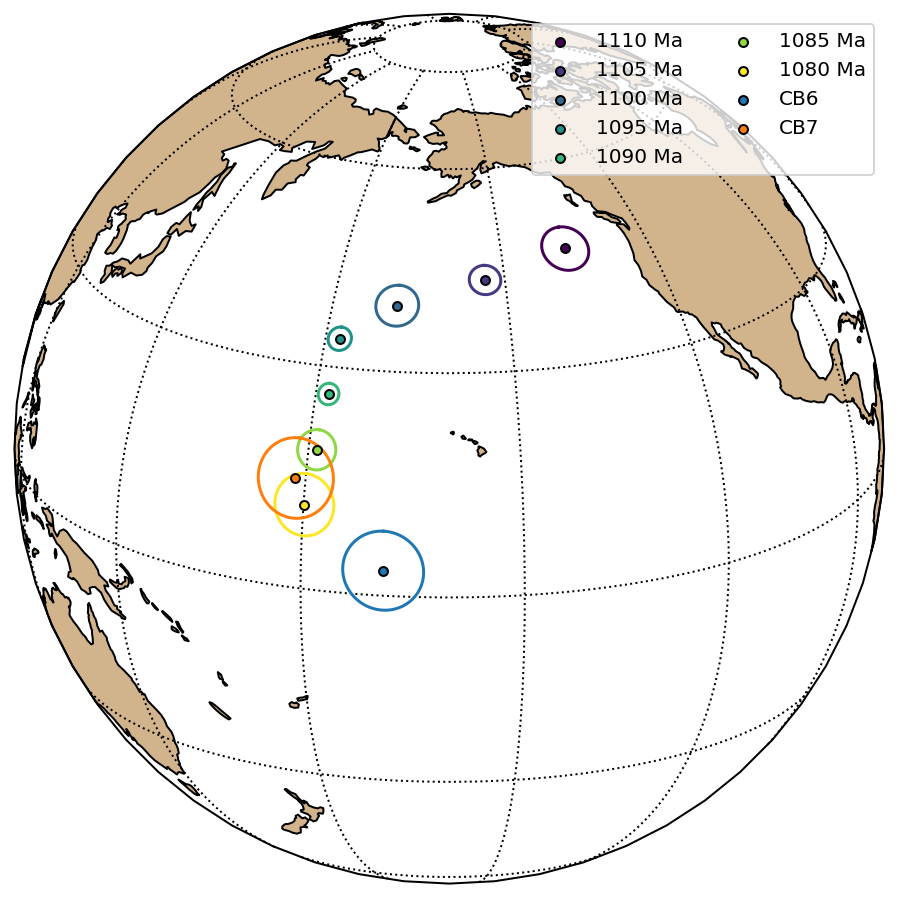

In [26]:
plt.figure(figsize = (6,6))
m = ipmag.make_orthographic_map(central_longitude=200, central_latitude=20)

synthetic_ages = [1080, 1085, 1090, 1095, 1100, 1105, 1110]
cNorm  = colors.Normalize(vmin=min(synthetic_ages), vmax=max(synthetic_ages))
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis')

synthetic_colors = [colors.rgb2hex(scalarMap.to_rgba(synthetic_ages[i])) for i in range(len(synthetic_ages))]

one_Euler_pole_lon = np.loadtxt('../data/mcplates_results/pole_lon_positions_2_true.txt')
one_Euler_pole_lat = np.loadtxt('../data/mcplates_results/pole_lat_positions_2_true.txt')

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(m,fisher0['dec'],fisher0['inc'],theta0,color=synthetic_colors[0],label='1110 Ma')

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(m,fisher1['dec'],fisher1['inc'],theta1,color=synthetic_colors[1],label='1105 Ma')

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(m,fisher2['dec'],fisher2['inc'],theta2,color=synthetic_colors[2],label='1100 Ma')

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(m,fisher3['dec'],fisher3['inc'],theta3,color=synthetic_colors[3],label='1095 Ma')

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(m,fisher4['dec'],fisher4['inc'],theta4,color=synthetic_colors[4],label='1090 Ma')

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(m,fisher5['dec'],fisher5['inc'],theta5,color=synthetic_colors[5],label='1085 Ma')

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(m,fisher6['dec'],fisher6['inc'],theta6,color=synthetic_colors[6],label='1080 Ma')

for i in range(CB_Lava_Chuar_mt_tc.shape[0]):
    ipmag.plot_pole(m, CB_Lava_Chuar_mt_tc['vgp_lon'].tolist()[i], 
                     CB_Lava_Chuar_mt_tc['vgp_lat'].tolist()[i], 
                     CB_Lava_Chuar_mt_tc['dir_alpha95'].tolist()[i],
                     color = 'C'+str(i), label = CB_Lava_Chuar_mt_tc['site'].tolist()[i])


plt.legend(ncol=2)
plt.show()

### Cardenas Basalts at Basalt Canyon

site CB8-18 and CBS1 are collected form river mile 70 Basalt Canyon. 

In [27]:
CB_Basalt_Canyon_mt_tc = CB_site_data_mt_tc[~CB_site_data_mt_tc['site'].isin(['CB1','CB2','CB3','CB4','CB5','CB6','CB7'])]

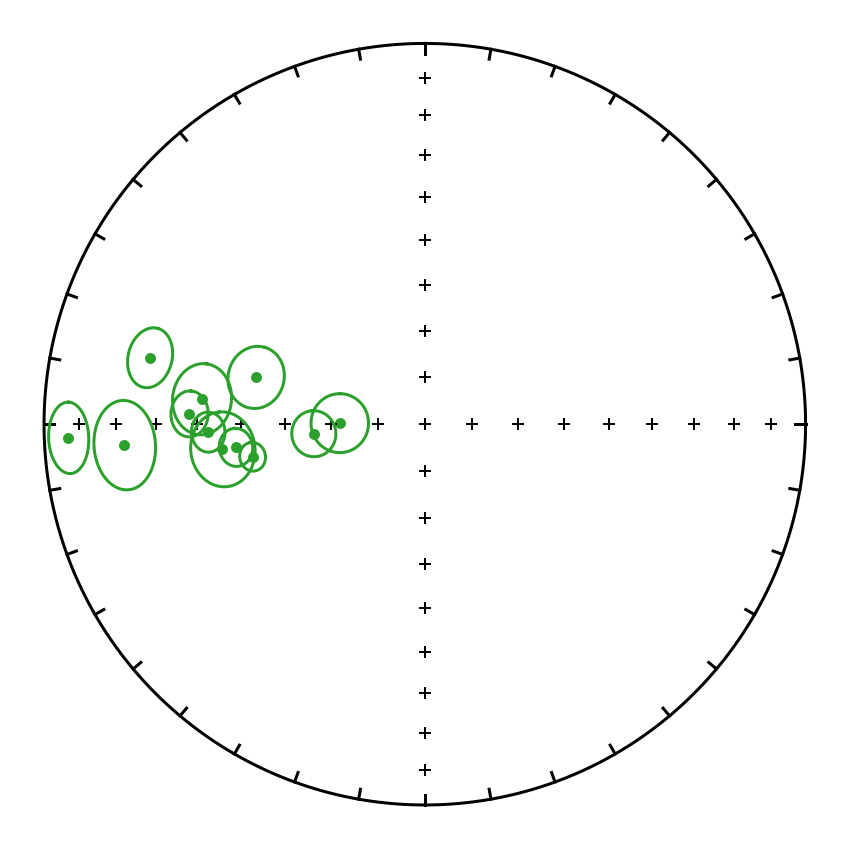

In [28]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
for i in range(CB_Basalt_Canyon_mt_tc.shape[0]):
    ipmag.plot_di_mean(CB_Basalt_Canyon_mt_tc['dir_dec'].tolist()[i], 
                     CB_Basalt_Canyon_mt_tc['dir_inc'].tolist()[i], 
                     CB_Basalt_Canyon_mt_tc['dir_alpha95'].tolist()[i],
                     color = 'C2')

# plt.legend()
plt.show()

<Figure size 432x432 with 0 Axes>

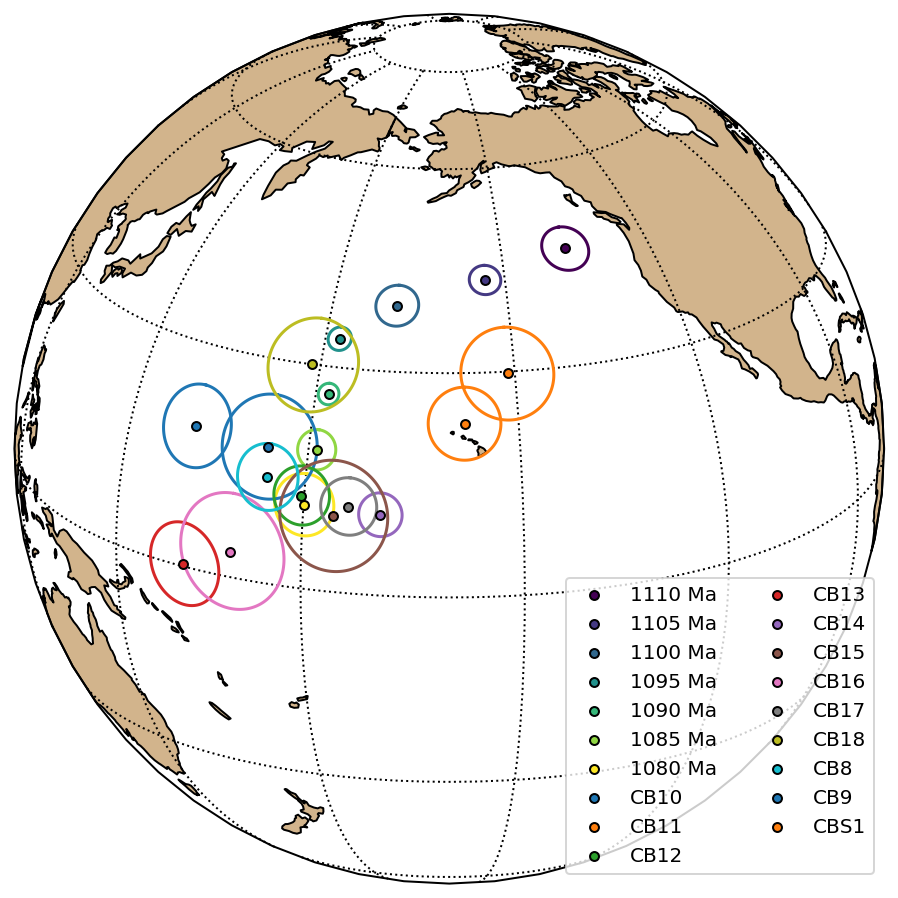

In [29]:
plt.figure(figsize = (6,6))
m = ipmag.make_orthographic_map(central_longitude=200, central_latitude=20)

synthetic_ages = [1080, 1085, 1090, 1095, 1100, 1105, 1110]
cNorm  = colors.Normalize(vmin=min(synthetic_ages), vmax=max(synthetic_ages))
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis')

synthetic_colors = [colors.rgb2hex(scalarMap.to_rgba(synthetic_ages[i])) for i in range(len(synthetic_ages))]

one_Euler_pole_lon = np.loadtxt('../data/mcplates_results/pole_lon_positions_2_true.txt')
one_Euler_pole_lat = np.loadtxt('../data/mcplates_results/pole_lat_positions_2_true.txt')

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(m,fisher0['dec'],fisher0['inc'],theta0,color=synthetic_colors[0],label='1110 Ma')

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(m,fisher1['dec'],fisher1['inc'],theta1,color=synthetic_colors[1],label='1105 Ma')

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(m,fisher2['dec'],fisher2['inc'],theta2,color=synthetic_colors[2],label='1100 Ma')

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(m,fisher3['dec'],fisher3['inc'],theta3,color=synthetic_colors[3],label='1095 Ma')

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(m,fisher4['dec'],fisher4['inc'],theta4,color=synthetic_colors[4],label='1090 Ma')

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(m,fisher5['dec'],fisher5['inc'],theta5,color=synthetic_colors[5],label='1085 Ma')

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(m,fisher6['dec'],fisher6['inc'],theta6,color=synthetic_colors[6],label='1080 Ma')

for i in range(CB_Basalt_Canyon_mt_tc.shape[0]):
    ipmag.plot_pole(m, CB_Basalt_Canyon_mt_tc['vgp_lon'].tolist()[i], 
                     CB_Basalt_Canyon_mt_tc['vgp_lat'].tolist()[i], 
                     CB_Basalt_Canyon_mt_tc['dir_alpha95'].tolist()[i],
                     color = 'C'+str(i), label = CB_Basalt_Canyon_mt_tc['site'].tolist()[i])


plt.legend(ncol=2)
plt.show()

## plot combined 1080 units (interpreted) pole position

In [30]:
Cardenas_all =  pd.concat([CB_Nankoweap_mt_tc, CB_Lava_Chuar_mt_tc, CB_Basalt_Canyon_mt_tc])
Cardenas_all = Cardenas_all[~Cardenas_all['site'].str.contains('CBS')]
Cardenas_all_mean_pole = ipmag.fisher_mean(Cardenas_all['vgp_lon'].tolist(), Cardenas_all['vgp_lat'].tolist())
Cardenas_all_mean_pole

{'dec': 184.59372164828602,
 'inc': 16.35368757511877,
 'n': 18,
 'r': 17.24237079918689,
 'k': 22.43841708022223,
 'alpha95': 7.461310830847244,
 'csd': 17.099716520757973}

<Figure size 432x432 with 0 Axes>

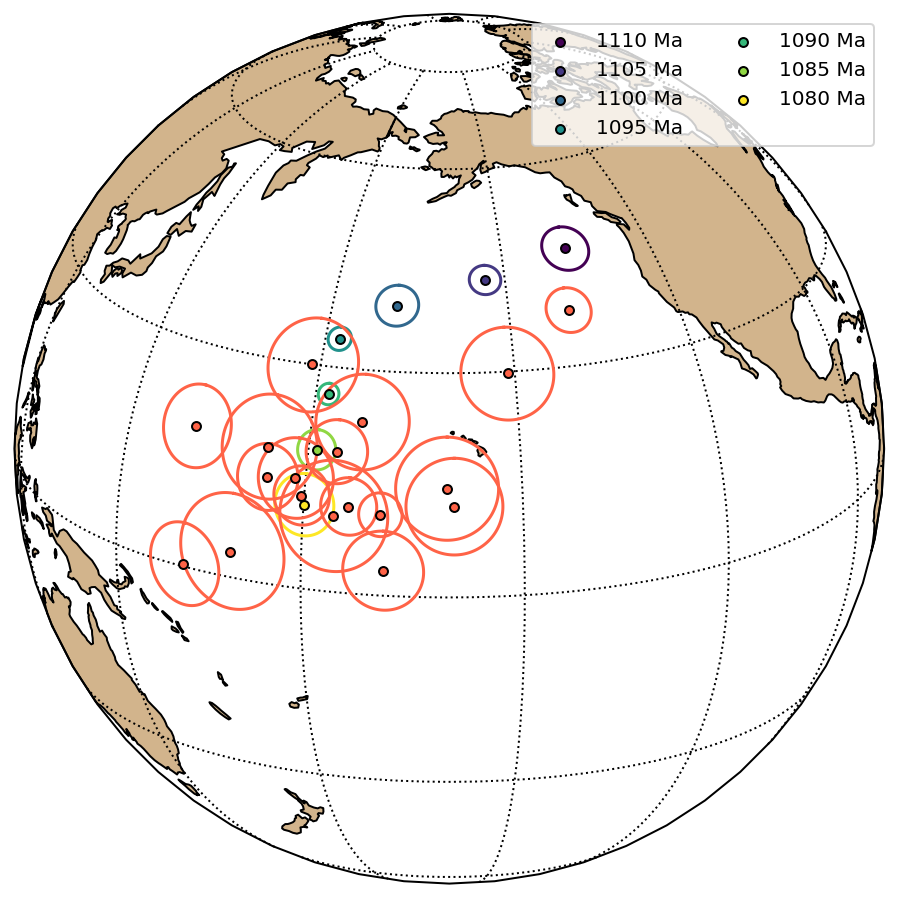

In [31]:
plt.figure(figsize = (6,6))
m = ipmag.make_orthographic_map(central_longitude=200, central_latitude=20)

synthetic_ages = [1080, 1085, 1090, 1095, 1100, 1105, 1110]
cNorm  = colors.Normalize(vmin=min(synthetic_ages), vmax=max(synthetic_ages))
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis')

synthetic_colors = [colors.rgb2hex(scalarMap.to_rgba(synthetic_ages[i])) for i in range(len(synthetic_ages))]

one_Euler_pole_lon = np.loadtxt('../data/mcplates_results/pole_lon_positions_2_true.txt')
one_Euler_pole_lat = np.loadtxt('../data/mcplates_results/pole_lat_positions_2_true.txt')

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(m,fisher0['dec'],fisher0['inc'],theta0,color=synthetic_colors[0],label='1110 Ma')

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(m,fisher1['dec'],fisher1['inc'],theta1,color=synthetic_colors[1],label='1105 Ma')

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(m,fisher2['dec'],fisher2['inc'],theta2,color=synthetic_colors[2],label='1100 Ma')

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(m,fisher3['dec'],fisher3['inc'],theta3,color=synthetic_colors[3],label='1095 Ma')

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(m,fisher4['dec'],fisher4['inc'],theta4,color=synthetic_colors[4],label='1090 Ma')

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(m,fisher5['dec'],fisher5['inc'],theta5,color=synthetic_colors[5],label='1085 Ma')

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(m,fisher6['dec'],fisher6['inc'],theta6,color=synthetic_colors[6],label='1080 Ma')

ipmag.plot_poles(m, Cardenas_all['vgp_lon'].tolist(), Cardenas_all['vgp_lat'].tolist(), Cardenas_all['dir_alpha95'].tolist(), color = 'tomato')


plt.legend(ncol=2)
plt.show()

<Figure size 432x432 with 0 Axes>

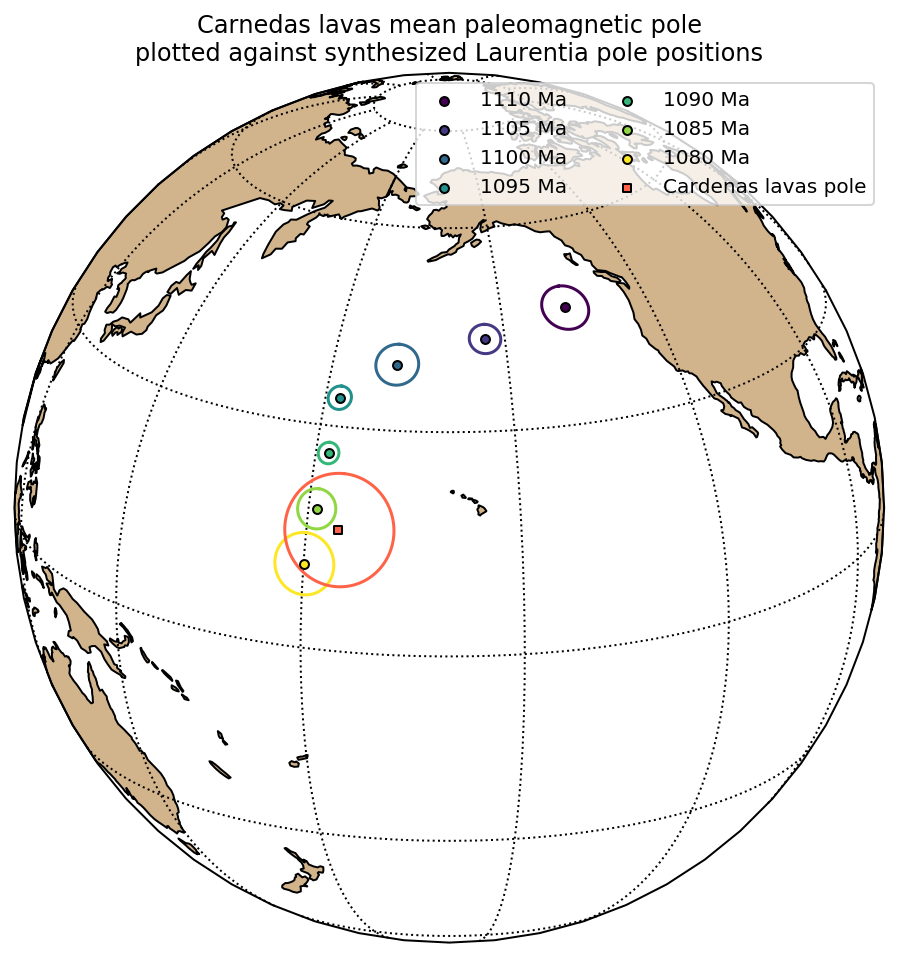

In [32]:
plt.figure(figsize = (6,6))
m = ipmag.make_orthographic_map(central_longitude=200, central_latitude=20)

synthetic_ages = [1080, 1085, 1090, 1095, 1100, 1105, 1110]
cNorm  = colors.Normalize(vmin=min(synthetic_ages), vmax=max(synthetic_ages))
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis')

synthetic_colors = [colors.rgb2hex(scalarMap.to_rgba(synthetic_ages[i])) for i in range(len(synthetic_ages))]

one_Euler_pole_lon = np.loadtxt('../data/mcplates_results/pole_lon_positions_2_true.txt')
one_Euler_pole_lat = np.loadtxt('../data/mcplates_results/pole_lat_positions_2_true.txt')

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(m,fisher0['dec'],fisher0['inc'],theta0,color=synthetic_colors[0],label='1110 Ma')

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(m,fisher1['dec'],fisher1['inc'],theta1,color=synthetic_colors[1],label='1105 Ma')

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(m,fisher2['dec'],fisher2['inc'],theta2,color=synthetic_colors[2],label='1100 Ma')

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(m,fisher3['dec'],fisher3['inc'],theta3,color=synthetic_colors[3],label='1095 Ma')

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(m,fisher4['dec'],fisher4['inc'],theta4,color=synthetic_colors[4],label='1090 Ma')

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(m,fisher5['dec'],fisher5['inc'],theta5,color=synthetic_colors[5],label='1085 Ma')

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(m,fisher6['dec'],fisher6['inc'],theta6,color=synthetic_colors[6],label='1080 Ma')

ipmag.plot_pole(m, Cardenas_all_mean_pole['dec'], Cardenas_all_mean_pole['inc'], Cardenas_all_mean_pole['alpha95'], marker = 's', color = 'tomato', label='Cardenas lavas pole')

plt.title('Carnedas lavas mean paleomagnetic pole\nplotted against synthesized Laurentia pole positions')
plt.legend(ncol=2)
# plt.savefig('../Figure/Cardenas_pole.pdf', bbox_inches='tight')
plt.show()

## Applying Bryan 1986 Colorado plateau rotation 

3.9 (1.4-6.6 95% confidence interval) CW rotation of the plateau around Euler pole of 37N, 103W

In [33]:
units_1080_mean_pole_lat_rot, units_1080_mean_pole_lon_rot = pmag.pt_rot([37, -103, 3.9], [units_1080_mean_pole['inc']], [units_1080_mean_pole['dec']])
units_1080_mean_pole_lat_rot, units_1080_mean_pole_lon_rot

NameError: name 'units_1080_mean_pole' is not defined

In [ ]:
plt.figure(figsize = (6,6))
m = ipmag.make_orthographic_map(central_longitude=200, central_latitude=20)

synthetic_ages = [1080, 1085, 1090, 1095, 1100, 1105, 1110]
cNorm  = colors.Normalize(vmin=min(synthetic_ages), vmax=max(synthetic_ages))
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis')

synthetic_colors = [colors.rgb2hex(scalarMap.to_rgba(synthetic_ages[i])) for i in range(len(synthetic_ages))]

one_Euler_pole_lon = np.loadtxt('../data/mcplates_results/pole_lon_positions_2_true.txt')
one_Euler_pole_lat = np.loadtxt('../data/mcplates_results/pole_lat_positions_2_true.txt')

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(m,fisher0['dec'],fisher0['inc'],theta0,color=synthetic_colors[0],label='1110 Ma')

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(m,fisher1['dec'],fisher1['inc'],theta1,color=synthetic_colors[1],label='1105 Ma')

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(m,fisher2['dec'],fisher2['inc'],theta2,color=synthetic_colors[2],label='1100 Ma')

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(m,fisher3['dec'],fisher3['inc'],theta3,color=synthetic_colors[3],label='1095 Ma')

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(m,fisher4['dec'],fisher4['inc'],theta4,color=synthetic_colors[4],label='1090 Ma')

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(m,fisher5['dec'],fisher5['inc'],theta5,color=synthetic_colors[5],label='1085 Ma')

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(m,fisher6['dec'],fisher6['inc'],theta6,color=synthetic_colors[6],label='1080 Ma')

# ipmag.plot_pole(m, units_1080_mean_pole['dec'], units_1080_mean_pole['inc'], units_1080_mean_pole['alpha95'], marker = 's', color = 'tomato', label='Grand Canyon pole')
ipmag.plot_pole(m, units_1080_mean_pole_lon_rot[0], units_1080_mean_pole_lat_rot[0], units_1080_mean_pole['alpha95'], marker = 's', color = 'dodgerblue', label='Cardenas pole')



plt.legend(ncol=2)
# plt.savefig('../Figure/Cardenas_pole_rotated.pdf')
plt.show()